# Procedimieto

### I.  Cargamos librerias basicas para el analisis y cargamos la data.

La tabla de datos fue cargada utilizando la libreria Pandas, y posteriormente se separo la data en atributos (X) y clasificación (Y).
Para el caso de los atributos, se consideraron del 1 al 18, dejando fuera el atributo "Si tiene teléfono" y "Si es un trabajador extranjero". Esto ultimo tomando en cuenta las concideraciones entregadas: 

        (a) Las tarifas telefónicas son altas en el pais de donde provienen los clientes de este banco.
        (b) Hay una alta tasa de migración en el pais de donde provienen los clientes de este banco.

De las cuales se infirío, que la posesion de una linea telefonica no era un indicador importante a la hora de clalificar a un cliente, debido que a los altos costos de esta las personas no utilizaran dicho servicio con recurrencia. Por otro lado al poseer una alta tasa de migracion, quiere decir, que existe un alto numero de extranjeros en el pais, por lo cual son un gran numero de potenciales clientes, de esta manera es indistinto si la persona que cumple con los requisitos comerciales es extranjero o no. 

In [7]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

data_table = pd.read_csv('data_desafio_seguros',index_col='row_id')
X = data_table.iloc[:,:18]
Y = data_table.iloc[:,20]
print(data_table)

          0   1    2     3      4    5    6  7    8     9  ...    11  12  \
row_id                                                     ...             
320     A12  30  A34   A40   4249  A61  A71  4  A94  A101  ...  A123  28   
211     A14  36  A32   A43   3835  A65  A75  2  A92  A101  ...  A121  45   
23      A12  12  A34   A41   1804  A62  A72  3  A93  A101  ...  A122  44   
439     A13  12  A31   A49    609  A61  A72  4  A92  A101  ...  A121  26   
237     A12  21  A32   A49   2767  A62  A75  4  A91  A101  ...  A123  61   
549     A14  48  A34   A41   8858  A65  A74  2  A93  A101  ...  A124  35   
287     A12  48  A33  A410   7582  A62  A71  2  A93  A101  ...  A124  31   
714     A12  60  A32   A40  14027  A61  A74  4  A93  A101  ...  A124  27   
799     A12   9  A32   A40   1549  A65  A72  4  A93  A101  ...  A121  35   
888     A14  36  A34   A40   6614  A61  A75  4  A93  A101  ...  A123  34   
795     A14   9  A32   A42   2301  A62  A72  2  A92  A101  ...  A122  22   
982     A13 

### II. Realizamos un label encoder.

Las variables que se encontaban codificadas con variables del tipo "A11, A12, ..... , A192, A201, A202", fueron re-codificadas en variables de 0 a N-1, donde N corresponde al numero de clases dentro de cada atributo.

Posteriormente se verificaron las dimensiones de nuestros datos y se observo que tan balanceadas estaban las clases del problema.

(900, 18)
(900,)


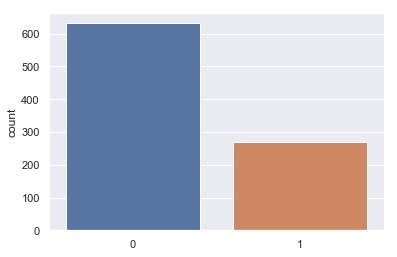

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X['0'] = labelencoder.fit_transform(X['0'])
X['2'] = labelencoder.fit_transform(X['2'])
X['3'] = labelencoder.fit_transform(X['3'])
X['5'] = labelencoder.fit_transform(X['5'])
X['6'] = labelencoder.fit_transform(X['6'])
X['8'] = labelencoder.fit_transform(X['8'])
X['9'] = labelencoder.fit_transform(X['9'])
X['11'] = labelencoder.fit_transform(X['11'])
X['13'] = labelencoder.fit_transform(X['13'])
X['14'] = labelencoder.fit_transform(X['14'])
X['16'] = labelencoder.fit_transform(X['16'])
Y = labelencoder.fit_transform(Y)
print (X.shape)
print (Y.shape)
sns.countplot(Y);plt.show()


### III. Se separo la data para entrenar y probar el modelo.

Se separo la data considerando un 10% para hacer el posterior testeo.

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, random_state = 0)
print('X train shape: ',x_train.shape)
print('Y train shape: ',y_train.shape)
print('X Test shape: ',x_test.shape)
print('Y Test shape: ',y_test.shape)

X train shape:  (810, 18)
Y train shape:  (810,)
X Test shape:  (90, 18)
Y Test shape:  (90,)


### IV. Se escogio el modelo y se buscaron los parametros optimos.

Primero se escogio el modelo a utilizar, el cual fue un modelo del tipo Random Forest, el cual se ajusta bastante bien a problemas de clasificación y entrega una probabilidad en su output. Pero a pesar de ser un modelo rapido y con buena respuesta, tiende a caer facilmente en overfitting perdiendo la generalidad de este.

Para no caer en problemas de overfitting se realizo un proceso de Grid Search con cross validation, utilizando una grid con valores variados, buscando la combinacion con mejores resultados.


In [524]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

search_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
model = RandomForestClassifier()
cv_search = GridSearchCV(estimator = model, param_grid = search_grid,
                         cv = 3, verbose=2, n_jobs = -1)
cv_search.fit(x_train,y_train)
cv_search.best_params_

Fitting 3 folds for each of 3960 candidates, totalling 11880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 53.0min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

### V. Entrenamiento y testeo de modelo.

Luego de la larga espera del Grid Search, entrenamos el modelo con la mejor combinacion de parametros obtenida (best_params_).
Y se realizo una matriz de confusión para visualizar los resultados, junto a un print del reporte de la clasificación.

Model Score:  0.8222222222222222


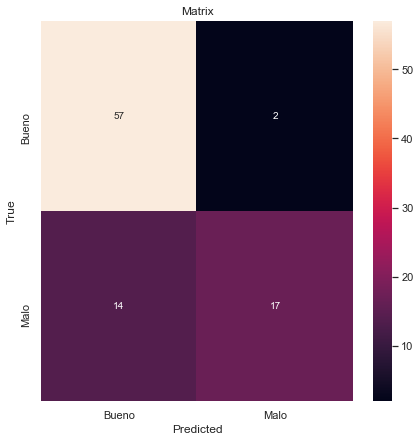

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        59
           1       0.89      0.55      0.68        31

   micro avg       0.82      0.82      0.82        90
   macro avg       0.85      0.76      0.78        90
weighted avg       0.83      0.82      0.81        90



In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

def resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(7, 7))
    sns.heatmap(conf_matrix, xticklabels=['Bueno','Malo'], yticklabels=['Bueno','Malo'], annot=True, fmt="d");
    plt.title("Matrix")
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    print (classification_report(y_test, pred_y))
    
model = RandomForestClassifier(max_depth=None , max_features= 'sqrt', n_estimators= 200,
                               min_samples_leaf = 4 ,
                               min_samples_split = 5)
model.fit(x_train,y_train)
print('Model Score: ',model.score(x_test,y_test))
prd = model.predict(x_test)
resultados(y_test,prd)

### VI. Ajuste del peso de las clases.

El Modelo respondio bastante bien para el set de datos de prueba, obteniendo un score de ~0.82, pero observando la matriz de confusion vemos un gran numero de casos mal clasificados, clasificando a 14 clientes "Malos" como "Buenos". Pero debemos recordar que dentro de las consideraciones del problema se tiene que, clasificar un cliente malo como uno bueno es 5 veces peor que clasificar uno bueno que malo, por lo tanto, se ajustaran los pesos de cada clase dentro del modelo. Esto buscando aumentar el racall de la clase 1 ("Malo"), es decir, reducir el numero de falsos positivos o falsos "Buenos".

Model Score:  0.7888888888888889


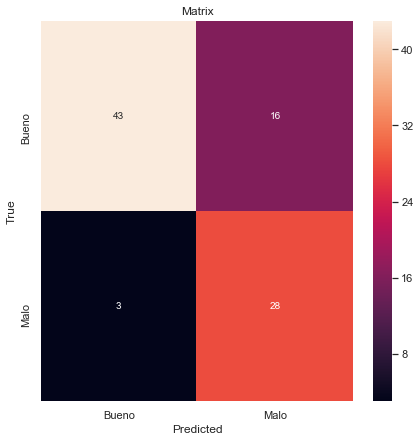

              precision    recall  f1-score   support

           0       0.93      0.73      0.82        59
           1       0.64      0.90      0.75        31

   micro avg       0.79      0.79      0.79        90
   macro avg       0.79      0.82      0.78        90
weighted avg       0.83      0.79      0.79        90



In [16]:
model = RandomForestClassifier(max_depth=None , max_features= 'sqrt', n_estimators= 200,
                               class_weight={0:1,1:5},min_samples_leaf = 4 ,
                               min_samples_split = 5)
model.fit(x_train,y_train)

print('Model Score: ',model.score(x_test,y_test))
prd = model.predict(x_test)
resultados(y_test,prd)

### VII. Determinacion del "score de riesgo".

El problema lo que pretende es encontrar el "score de riesgo" el cual se aplicará a los clientes segun sea su condicion, donde los mal evaluados tendran un score cercano a 1 y los bien evaluados a 0. De este modo, como el modelo genera una clasificacion entregando la probabilidad de que estos sean buenos o malos, el score de riesgo estara determinado por la probabilidad de que un cliente sea "Malo", la cual corresponde a la clase '1'.

In [30]:
prd_p = model.predict_proba(x_test)
for i in range(len(prd_p)):
    print ('Score de Riesgo cliente %s: %s' %(i+1,round(prd_p[i,1],2)))

Score de Riesgo cliente 1: 0.76
Score de Riesgo cliente 2: 0.12
Score de Riesgo cliente 3: 0.38
Score de Riesgo cliente 4: 0.61
Score de Riesgo cliente 5: 0.44
Score de Riesgo cliente 6: 0.74
Score de Riesgo cliente 7: 0.42
Score de Riesgo cliente 8: 0.85
Score de Riesgo cliente 9: 0.38
Score de Riesgo cliente 10: 0.5
Score de Riesgo cliente 11: 0.51
Score de Riesgo cliente 12: 0.48
Score de Riesgo cliente 13: 0.48
Score de Riesgo cliente 14: 0.55
Score de Riesgo cliente 15: 0.42
Score de Riesgo cliente 16: 0.6
Score de Riesgo cliente 17: 0.86
Score de Riesgo cliente 18: 0.44
Score de Riesgo cliente 19: 0.61
Score de Riesgo cliente 20: 0.21
Score de Riesgo cliente 21: 0.77
Score de Riesgo cliente 22: 0.24
Score de Riesgo cliente 23: 0.67
Score de Riesgo cliente 24: 0.77
Score de Riesgo cliente 25: 0.62
Score de Riesgo cliente 26: 0.75
Score de Riesgo cliente 27: 0.74
Score de Riesgo cliente 28: 0.36
Score de Riesgo cliente 29: 0.65
Score de Riesgo cliente 30: 0.06
Score de Riesgo clien

### VIII. Conclusión

Respecto al objetivo de determinar el "score de riesgo" de los clientes del banco, podemos decir que se logro entregar de buena forma el valor, generando un modelo de clasificacion de clientes. Por otro lado, la eleccion del modelo fue bastante buena, en funcion de los resultados, el Random Forest Classifier se ajusto bastante bien y mantuvo la generalidad, esto ultimo gracias al proceso de Grid Search que permitio entregar la parametrización optima. Finalmente se realizo un ajuste a los pesos de las clases, con el fin de atender a la consideracion de lo importante que era no calificar bien a clientes malos, logrando asi un aumento en el racall de la clase "Malo" de 0.55 a 0.9, sin penalizar tanto el score del modelo.
